In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data
with open('./data/parsed_constitution.json', 'r', encoding='utf-8') as f:
    constitution = json.load(f)

In [4]:
constitution

[{'section': 'I',
  'section_title': 'RZECZPOSPOLITA',
  'article': '1',
  'text': 'Rzeczpospolita Polska jest dobrem wspólnym wszystkich obywateli.'},
 {'section': 'I',
  'section_title': 'RZECZPOSPOLITA',
  'article': '2',
  'text': 'Rzeczpospolita Polska jest demokratycznym państwem prawnym, urzeczywistniającym zasady sprawiedliwości społecznej.'},
 {'section': 'I',
  'section_title': 'RZECZPOSPOLITA',
  'article': '3',
  'text': 'Rzeczpospolita Polska jest państwem jednolitym.'},
 {'section': 'I',
  'section_title': 'RZECZPOSPOLITA',
  'article': '4',
  'text': '1. Władza zwierzchnia w Rzeczypospolitej Polskiej należy do Narodu. 2. Naród sprawuje władzę przez swoich przedstawicieli lub bezpośrednio.'},
 {'section': 'I',
  'section_title': 'RZECZPOSPOLITA',
  'article': '5',
  'text': 'Rzeczpospolita Polska strzeże niepodl egłości i nienaruszalności swojego terytorium, zapewnia wolności i prawa człowieka i obywatela oraz bezpieczeństwo obywateli, strzeże dziedzictwa narodowego oraz 

In [15]:
order_roman = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII']

In [17]:
# Display unique sections
sections = set()
for article in constitution:
    sections.add(article['section'])
sections = list(sections)
sections.sort(key=lambda x: order_roman.index(x))
sections

['I',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'VIII',
 'IX',
 'X',
 'XI',
 'XII',
 'XIII']

In [9]:
# Display unique section_titles
section_titles = set()
for article in constitution:
    section_titles.add(article['section_title'])
sorted(list(section_titles))

['FINANSE PUBLICZNE',
 'ORGANY KONTROLI PAŃSTWOWEJ I OCHRONY PRAWA',
 'PREZYDENT RZECZYPOSPOLITEJ POLSKIEJ',
 'PRZEPISY PRZEJŚCIOWE I KOŃCOWE',
 'RADA MINISTRÓW I ADMINISTRACJA RZĄDOWA',
 'RZECZPOSPOLITA',
 'SAMORZĄD TERYTORIALNY',
 'SEJM I SENAT',
 'STANY NADZWYCZAJNE',
 'SĄDY I TRYBUNAŁY',
 'WOLNOŚCI, PRAWA I OBOWIĄZKI CZŁOWIEKA I OBYWATELA',
 'ZMIANA KONSTYTUCJI',
 'ŹRÓDŁA PRAWA']

In [18]:
# Display number of articles in each section
section_counts = {}
for section in sections:
    section_counts[section] = 0
for article in constitution:
    section_counts[article['section']] += 1

# Sort the dict by the order of sections
section_counts = dict(sorted(section_counts.items(), key=lambda x: order_roman.index(x[0])))
section_counts

{'I': 29,
 'II': 57,
 'III': 8,
 'IV': 31,
 'V': 20,
 'VI': 17,
 'VII': 10,
 'VIII': 29,
 'IX': 14,
 'X': 12,
 'XI': 7,
 'XII': 1,
 'XIII': 8}

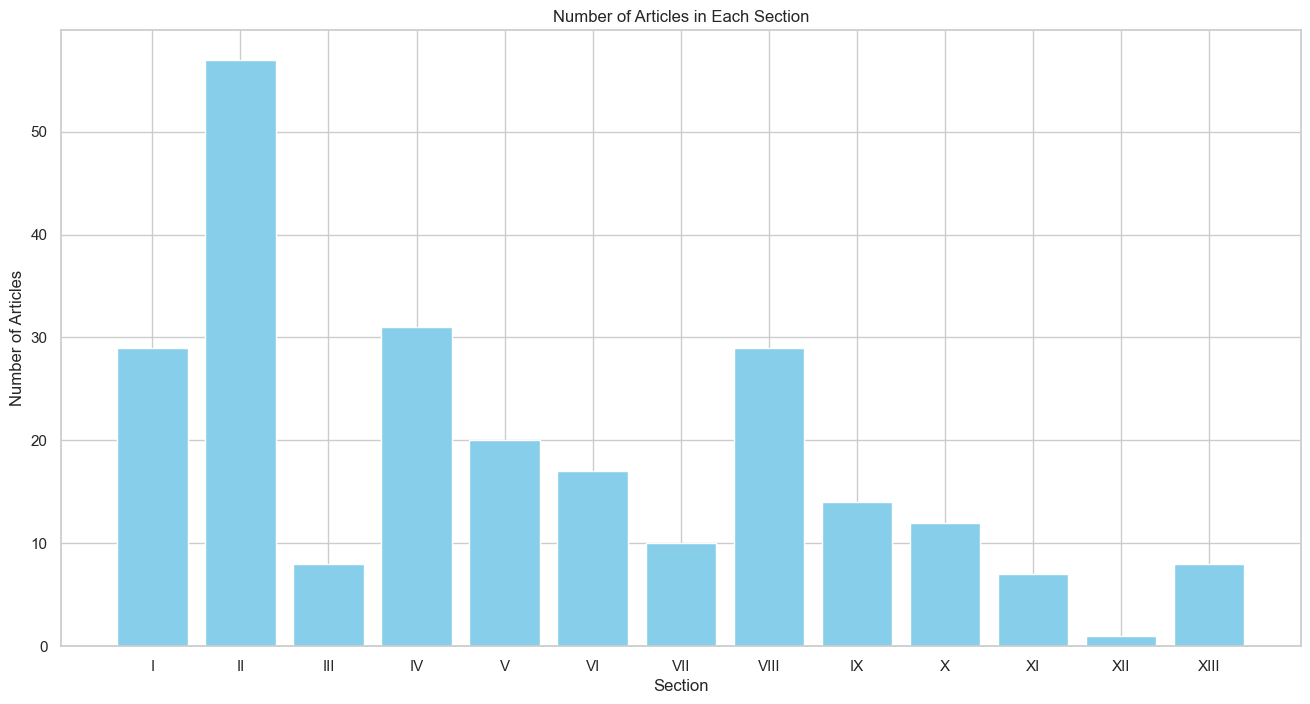

In [21]:
# barplot of number of articles in each section from section_counts
sns.set(style='whitegrid')
plt.figure(figsize=(16, 8))
plt.bar(section_counts.keys(), section_counts.values(), color='skyblue')
plt.xlabel('Section')
plt.ylabel('Number of Articles')
plt.title('Number of Articles in Each Section')
plt.show()

In [22]:
# Total number of articles
total_articles = sum(section_counts.values())
total_articles

243

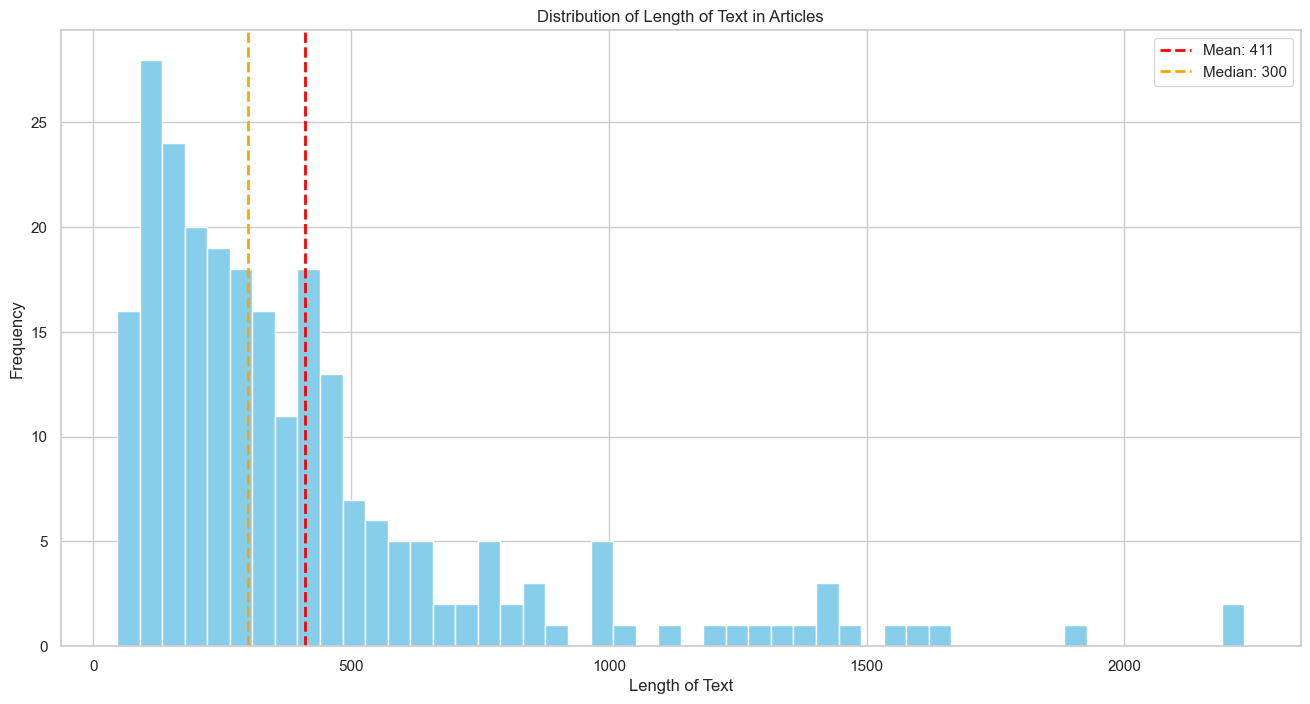

In [29]:
# histogram of the distribution of len of the 'text' field in each article
text_lens = [len(article['text']) for article in constitution]
plt.figure(figsize=(16, 8))
plt.hist(text_lens, bins=50, color='skyblue')
# Select mean and median values
mean_len = np.mean(text_lens)
median_len = np.median(text_lens)
plt.axvline(mean_len, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median_len, color='orange', linestyle='dashed', linewidth=2)
plt.legend([f'Mean: {mean_len:.0f}', f'Median: {median_len:.0f}'])
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Text in Articles')
plt.show()